In [1]:
%matplotlib inline
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import pywt

# from scipy.optimize import fsolve
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.15)

In [2]:
base_path = os.path.dirname(os.getcwd())
signal = np.load(os.path.join(base_path, 'single_elm_event.npy'))
signal.shape

(5797, 64)

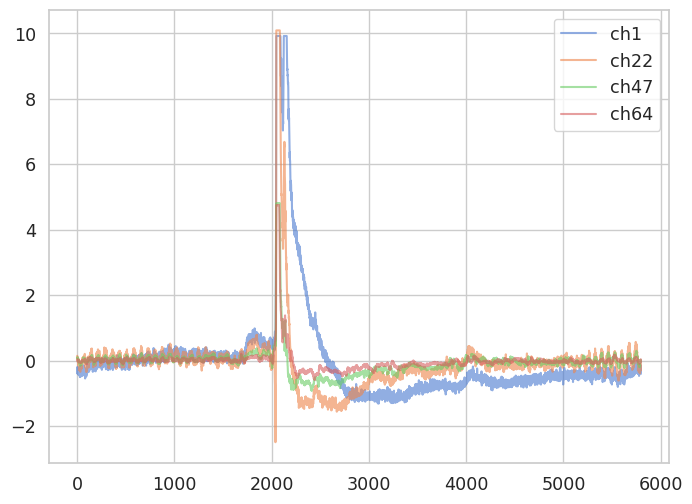

In [3]:
signal_ch1 = signal[:, 0]
signal_ch22 = signal[:, 21]
signal_ch47 = signal[:, 46]
signal_ch64 = signal[:, -1]

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(signal_ch1, alpha=0.6, label='ch1')
ax.plot(signal_ch22, alpha=0.6, label='ch22')
ax.plot(signal_ch47, alpha=0.6, label='ch47')
ax.plot(signal_ch64, alpha=0.6, label='ch64')
ax.legend()
plt.show()

## Using CWT

64


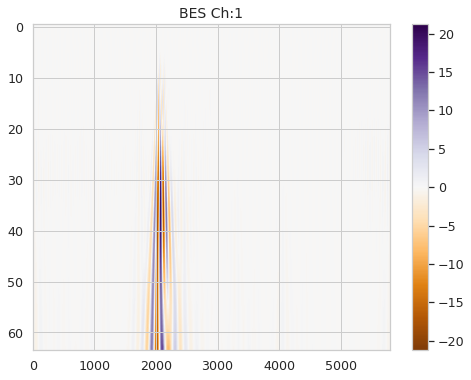

In [5]:
# apply wavelet transforms using pywt
widths = np.arange(0, 129, 2)[1:]
coeffs, freqs = pywt.cwt(signal_ch1, widths, 'morl', axis=0)
# coeffs_squared = np.log(coeffs**2)
print(len(freqs))
plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
)
plt.colorbar()
plt.title('BES Ch:1', fontsize=14);

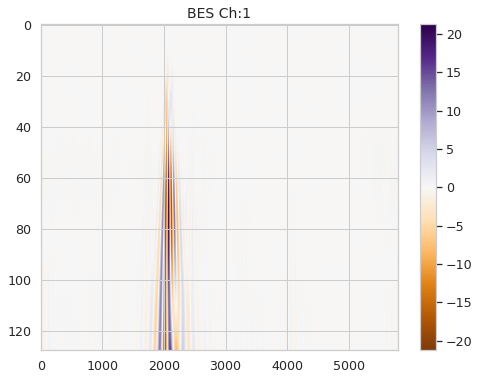

In [6]:
widths = np.arange(0, 129)[1:]
coeffs, freqs = pywt.cwt(signal_ch1, widths, 'morl', axis=0)
# coeffs_squared = np.log(coeffs**2)
plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
)
plt.colorbar()
plt.title('BES Ch:1', fontsize=14);

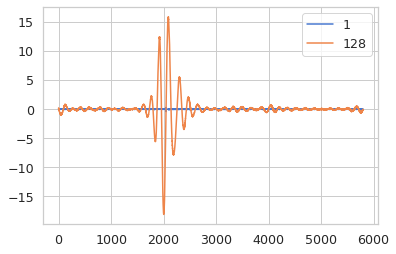

In [7]:
plt.plot(coeffs[0, :], label='1')
plt.plot(coeffs[-1, :], label='128')
plt.legend()
plt.show()

## Using non-decimated DWT

In [8]:
coeff_list = pywt.swt(signal_ch1[:-1], 'db2', level=2)
(cA2, cD2), (cA1, cD1) = coeff_list
len(cA2), len(cD2), len(cA1), len(cD1)

(5796, 5796, 5796, 5796)

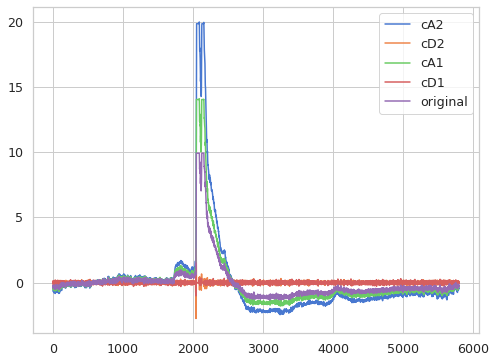

In [9]:
coeffs_list = pywt.swt(signal_ch1[:-1], 'db2', level=2)
(cA2, cD2), (cA1, cD1) = coeffs_list
plt.figure(figsize=(8, 6))
plt.plot(cA2, label='cA2')
plt.plot(cD2, label='cD2')
plt.plot(cA1, label='cA1')
plt.plot(cD1, label='cD1')
plt.plot(signal_ch1[:-1], label='original')
plt.legend()
plt.show()

## Using decimated DWT

In [10]:
pywt.dwt_max_level(len(signal_ch1), 'db2')

10

Length of approximation coefficients at level 10: 8
Length of detail coefficients at level 10: 8
Length of detail coefficients at level 9: 14
Length of detail coefficients at level 8: 25
Length of detail coefficients at level 7: 48
Length of detail coefficients at level 6: 93
Length of detail coefficients at level 5: 184
Length of detail coefficients at level 4: 365
Length of detail coefficients at level 3: 727
Length of detail coefficients at level 2: 1451
Length of detail coefficients at level 1: 2900


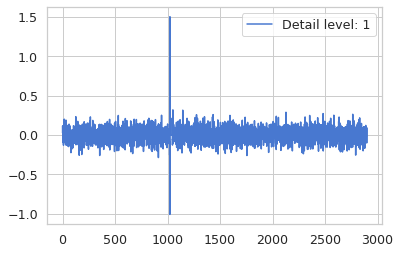

In [13]:
coeffs_list = pywt.wavedec(signal_ch1, 'db2')
cA10 = coeffs_list[0]
cDi = coeffs_list[1:]
print(f'Length of approximation coefficients at level 10: {len(cA10)}')
for i, cD in enumerate(cDi):
    print(f'Length of detail coefficients at level {10-i}: {len(cD)}')
plt.plot(cDi[-1], label=f'Detail level: 1')
plt.legend()
plt.show()

## Other channels

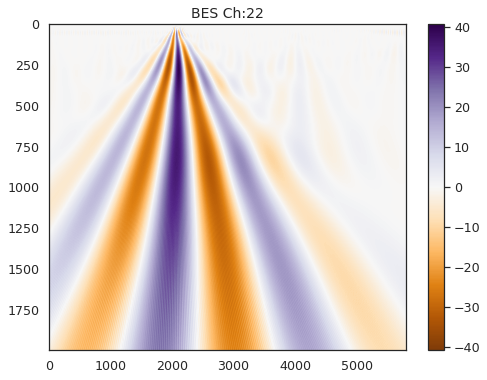

In [9]:
widths = np.arange(1, 2000)
coeffs, freqs = pywt.cwt(signal_ch22, widths, 'morl')

plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
    label='Ch22'
)
plt.colorbar()
plt.title('BES Ch:22', fontsize=14);

(256, 5797)


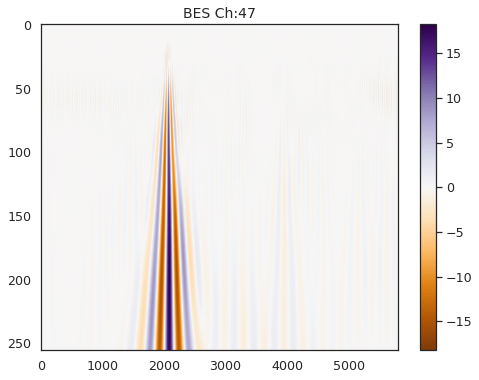

In [10]:
# apply wavelet transforms using pywt
widths = np.arange(1, 257)
coeffs, freqs = pywt.cwt(signal_ch47, widths, 'morl')
print(coeffs.shape)
plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
)
plt.colorbar()
plt.title('BES Ch:47', fontsize=14);

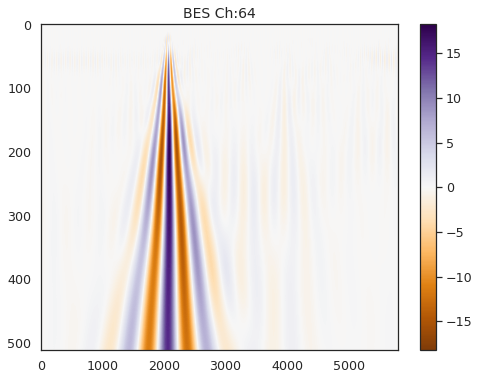

In [11]:
# apply wavelet transforms using pywt
widths = np.arange(1, 513)
coeffs, freqs = pywt.cwt(signal_ch47, widths, 'morl')

plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(coeffs).max(),
    vmin=-abs(coeffs).max(),
)
plt.colorbar()
plt.title('BES Ch:64', fontsize=14);

In [13]:
# apply wavelet transforms using pywt
widths = np.arange(1, 1025)
coeffs, freqs = pywt.cwt(signal, widths, 'morl', axis=0)

coeffs.shape

(1024, 5797, 64)

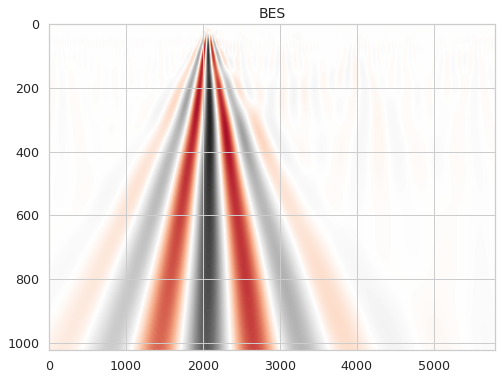

In [14]:
plt.figure(figsize=(8, 6))
plt.imshow(
    coeffs[:, :, -1],
    cmap="RdGy",
    aspect="auto",
    vmax=abs(coeffs[:, :, -1]).max(),
    vmin=-abs(coeffs[:, :, -1]).max(),
)
plt.title('BES', fontsize=14);

In [ ]:
# # Following class implements Morlet wavelet
# class Morlet(object):
#     def __init__(self, w0=6):
#         self.w0 = w0
#         if w0 == 6:
#             self.C_d = 0.776
    
#     def __call__(self, *args, **kwargs):
#         return self.time(*args, **kwargs)

#     def time(self, t, s=1.0, complete=True):
#         w = self.w0

#         x = t / s

#         output = np.exp(1j * w * x)

#         if complete:
#             output -= np.exp(-0.5 * (w**2))
        
#         output *= np.exp(-0.5 * (x**2)) * np.pi**(-0.25)

#         return output


# class CWT(nn.Module):
#     def __init__(
#         self, 
#         dj=0.0625, 
#         dt=1/2048, 
#         wavelet=Morlet(), 
#         fmin=20, 
#         fmax=500, 
#         output_format='Magnitude', 
#         trainable=False, 
#         hop_length=1
#     ):
#         super().__init__()
#         self.wavelet = wavelet
#         self.dt = dt
#         self.dj = dj
#         self.fmin = fmin
#         self.fmax = fmax
#         self.output_format = output_format
#         self.trainable = trainable
#         self.stride = (1, hop_length)
#         self._scale_minimum = self.compute_minimum_scale()

#         self.signal_length = None
#         self._channels = None
#         self._scales = None
#         self._kernel = None
#         self._kernel_real = None
#         self._kernel_imag = None

#     def compute_optimal_scales(self):
#         if self.signal_length is None:
#             raise ValueError('Please specify signal length before computing optimal scales')
        
#         J = int(
#             (1/self.dj) * np.log2(self.signal_length * self.dt / self._scale_minimum)
#         )
#         scales = self._scale_minimum * 2**(self.dj * np.arange(0, J+1))

#         # TODO: remove high and low frequencies

#         return scales
    
#     def compute_minimum_scale(self):
#         dt = self.dt

#         def __solver(s):
#             return self.wavelet.fourier_periods(s) - 2 * dt
        
#         return fsolve(__solver, 1)[0]
